In [3]:
import tensorflow as tf
# print('TensorFlow version: {}'.format(tf.__version__))

In [6]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as pt

## Import Fashion MNIST DATASET

In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


### Dictionary for class labels

In [8]:
labels={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",
          7:"Sneaker",8:"Bag",9:"Ankle boot"}

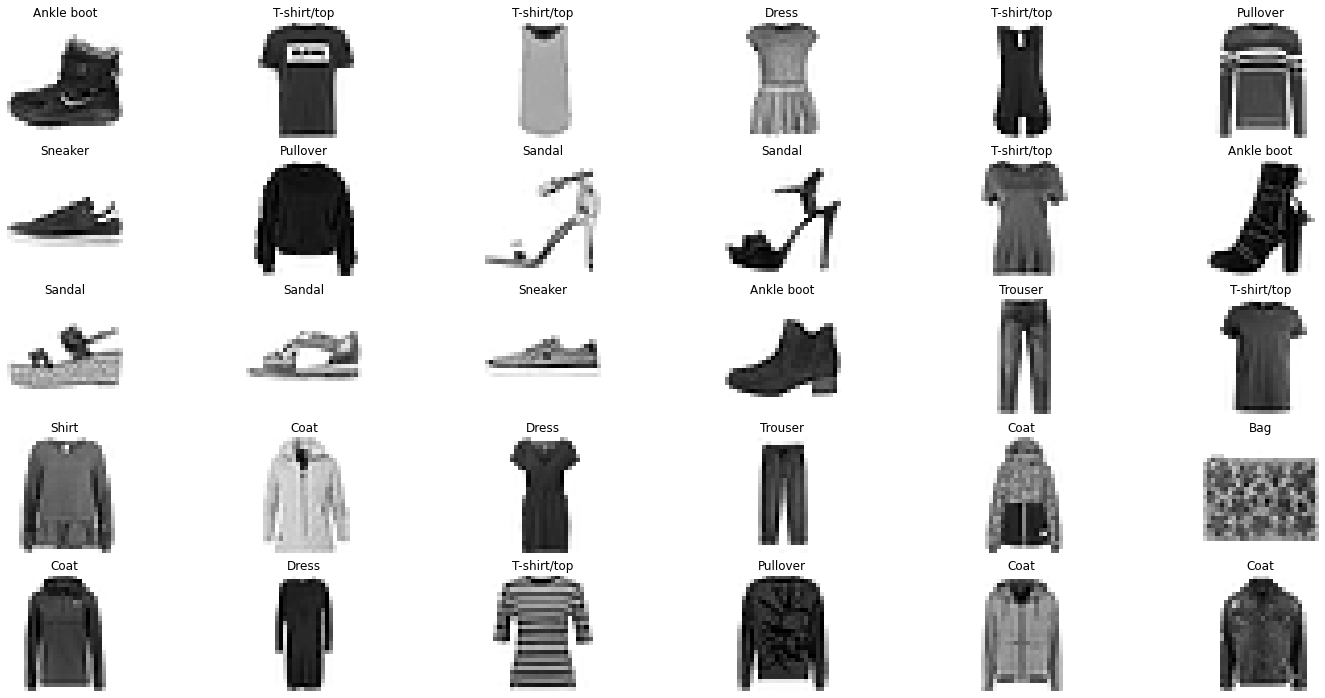

In [20]:
X=np.array(train_images)
pt.figure(figsize=(25,25))
for i in range(0,30):
    pt.subplot(10,6,i+1)   
    pt.axis('off')
    image = X[i].reshape(28,28)
    pt.imshow(image, cmap='gist_yarg',interpolation="nearest")
    pt.title(labels[train_labels[i]])

### Data Normalisation and Reshaping for model feeding

In [22]:
train_images=train_images/255.0
test_images=test_images/255.0

train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)
print(f"Train shape:{train_images.shape} of {train_images.dtype}\nTest shape:{test_images.shape} of {test_images.dtype}")

Train shape:(60000, 28, 28, 1) of float64
Test shape:(10000, 28, 28, 1) of float64


### Model Building

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 13, 13, 8)         80        
                                                                 
 flatten_4 (Flatten)         (None, 1352)              0         
                                                                 
 Dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5446 - sparse_categorical_accuracy: 0.8092
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4217 - sparse_categorical_accuracy: 0.8534
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - lo

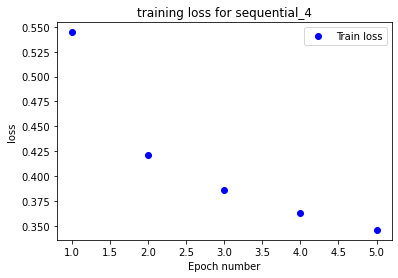

In [28]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, name='Dense')
])
model.summary()

# testing = False
epochs = 5

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history=model.fit(train_images, train_labels, epochs=epochs)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

metric=history.history['loss']
# val_metric=history.history['val_'+'loss']
e=range(1,6)

pt.plot(e, metric, 'bo', label='Train ' + 'loss')
# plt.plot(e, val_metric, 'b', label='Validation ' + 'loss')
pt.xlabel('Epoch number')
pt.ylabel('loss')
pt.title('training ' + 'loss' + ' for ' + model.name)
pt.legend()
pt.show()

In [43]:
from sklearn.metrics import classification_report
predicted=model.predict(test_images)
predicted
predicted_classes=np.argmax(predicted,axis=1)
print(classification_report(test_labels,predicted_classes))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.96      0.97      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.91      0.83      0.87      1000
           4       0.79      0.80      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.64      0.65      0.64      1000
           7       0.94      0.93      0.93      1000
           8       0.94      0.97      0.95      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### Data Visualisation

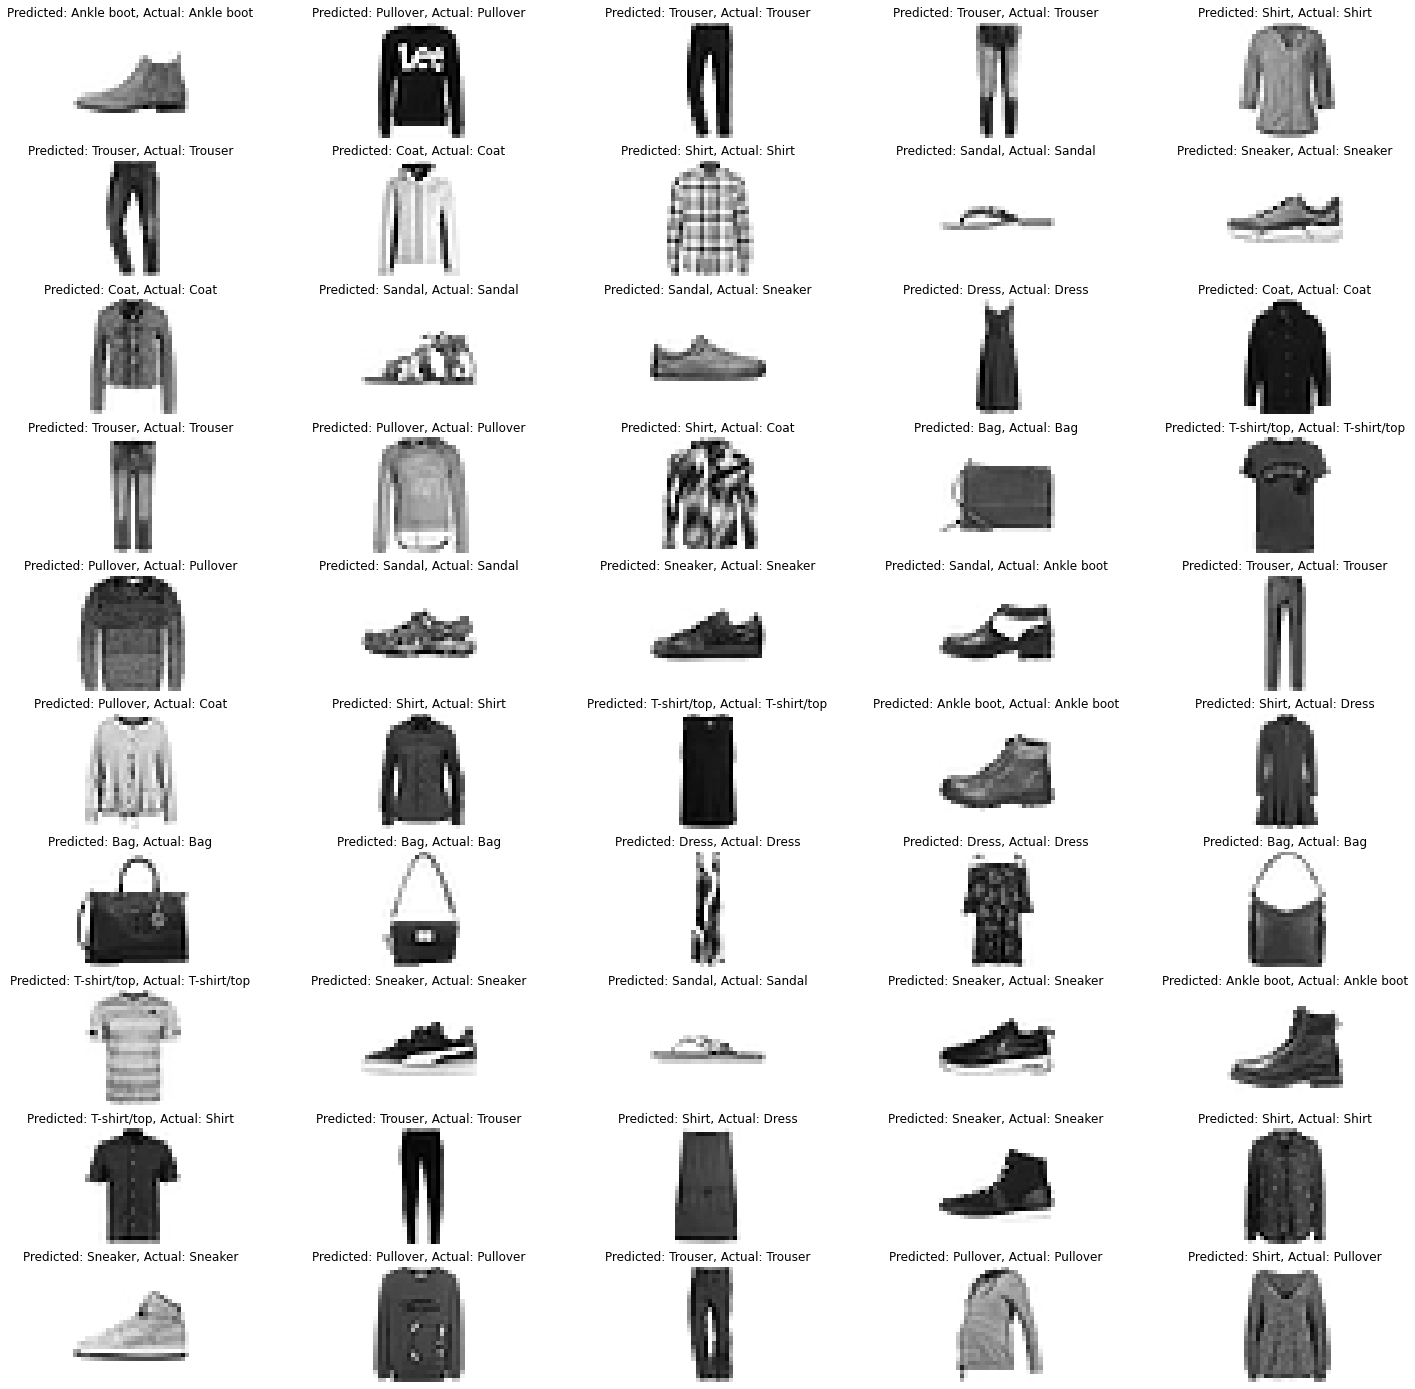

In [45]:
pt.figure(figsize = (25,25))
X = np.array(test_images)

for i in range(0,50):
    pt.subplot(10,5,i+1)
    pt.axis('off')
    image = X[i].reshape(28,28)
    pt.imshow(image, cmap='gist_yarg',interpolation="nearest")
    pt.title("Predicted: {}, Actual: {}".format(labels[predicted_classes[i]],labels[test_labels[i]]))

In [68]:
predicted_class_labels=np.array(list(labels[i] for i in predicted_classes))
predicted_class_labels=np.transpose(predicted_class_labels)
predicted_class_labels

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

### Fetch Keras session and save model

In [70]:
import os
MODEL_DIR = '../models/'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = ../models/1



INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


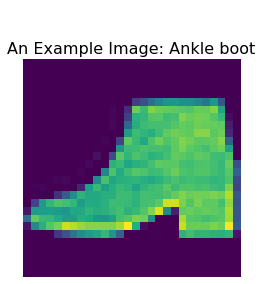

In [73]:
def show(idx, title):
  pt.figure()
  pt.imshow(test_images[idx].reshape(28,28))
  pt.axis('off')
  pt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))